In [1]:
%matplotlib inline

from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(context='paper', style='whitegrid')

from masterthesis.utils import iso639_3, heatmap, IMG_DIR

In [2]:
df = pd.read_csv('../ASK/metadata.csv')
print('%d documents total' % len(df))
print('%d tokens total' % df.num_tokens.sum())
df = df[~df.lang.isin(['nynorsk', 'bokmål'])]
print('%d non-Norwegian L1 documents' % len(df))
print('%d tokens total' % df.num_tokens.sum())
df = df[~df.cefr.isnull()]
print('%d documents with CEFR score' % len(df))
print('%d tokens total' % df.num_tokens.sum())
df.testlevel.replace(['Språkprøven', 'Høyere nivå'], ['IL test', 'AL test'], inplace=True)

1936 documents total
769881 tokens total
1736 non-Norwegian L1 documents
688948 tokens total
1212 documents with CEFR score
486743 tokens total


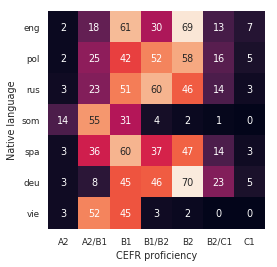

In [15]:
counts = df.groupby(['lang', 'cefr']).size().unstack(fill_value=0)

ax = sns.heatmap(counts, annot=True, fmt='d', square=True, cbar=False)
ax.set_yticklabels([iso639_3[l] for l in counts.index], rotation=0)

plt.ylabel('Native language')
plt.xlabel('CEFR proficiency')
# plt.savefig(str(IMG_DIR / 'lang_vs_cefr.pdf'), bbox_inches='tight')

plt.show()

In [4]:
counts = df.groupby(['testlevel', 'lang']).size().unstack(fill_value=0)
counts.columns = [iso639_3[l] for l in counts.columns]
counts.columns.name = 'L1'
counts.index.name = 'Test level'
counts

L1,eng,pol,rus,som,spa,deu,vie
Test level,,,,,,,
AL test,100,100,100,7,100,100,5
IL test,100,100,100,100,100,100,100


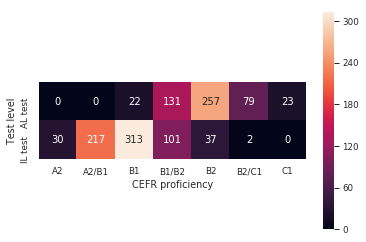

In [5]:
counts = df.groupby(['testlevel', 'cefr']).size().unstack(fill_value=0)

sns.heatmap(data=counts, annot=True, square=True, fmt='d')

plt.ylabel('Test level')
plt.xlabel('CEFR proficiency');

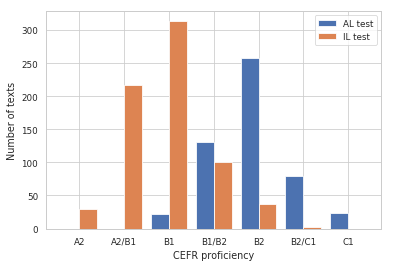

In [6]:
width = 0.4
xs = np.arange(len(counts.columns))
plt.bar(xs, counts.iloc[0], width=width, label=counts.index[0])
plt.bar(xs + width, counts.iloc[1], width=width, label=counts.index[1])
plt.xticks(xs + (width / 2), counts.columns)
plt.ylabel("Number of texts")
plt.xlabel("CEFR proficiency")
plt.legend();

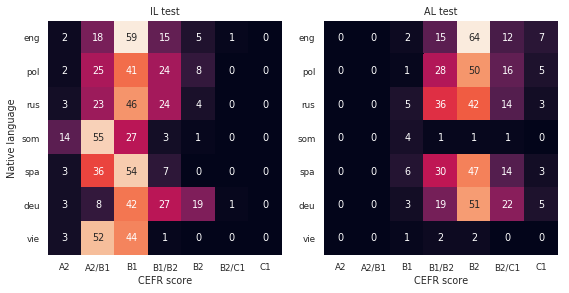

In [16]:
groups = df.groupby('testlevel')
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(8, 4)
    
columns = ['A2', 'A2/B1', 'B1', 'B1/B2', 'B2', 'B2/C1', 'C1']

for testlevel, group in groups:
    if testlevel == 'IL test':
        ax = axes[0]
    else:
        ax = axes[1]
    counts = group.groupby(['lang', 'cefr']).size().unstack(fill_value=0)
    for col in columns:
        if col not in counts.columns:
            counts[col] = 0
    counts = counts[columns]

    sns.heatmap(counts, annot=True, ax=ax, cbar=False, square=True)
    ax.set_yticklabels([iso639_3[l] for l in counts.index], rotation=0)
    ax.set_title(testlevel)

axes[0].set_ylabel('Native language')
axes[0].set_xlabel('CEFR score')
axes[1].set_xlabel('CEFR score')
axes[1].set_ylabel('')
plt.tight_layout()
# plt.savefig(str(IMG_DIR / 'testlevel_lang_vs_cefr.pdf'), bbox_inches='tight')
plt.show()

In [8]:
topic_and_level = df.groupby(['topic', 'testlevel']).size().unstack(fill_value=0)
topic_and_level['total'] = topic_and_level.sum(axis=1)
print(topic_and_level.sort_values('total', ascending=False).head(10).to_latex())

\begin{tabular}{lrrr}
\toprule
testlevel &  AL test &  IL test &  total \\
topic                     &          &          &        \\
\midrule
telefon                   &       37 &       64 &    101 \\
bolig                     &        0 &       83 &     83 \\
familie helse vekt        &       59 &        0 &     59 \\
tid                       &        2 &       51 &     53 \\
natur norge               &        0 &       48 &     48 \\
folk relasjoner vennskap  &        0 &       45 &     45 \\
tradisjoner flytting      &        0 &       38 &     38 \\
barn                      &        3 &       32 &     35 \\
kultur norge              &        0 &       34 &     34 \\
media                     &        0 &       31 &     31 \\
\bottomrule
\end{tabular}



In [9]:
for name, group in df.groupby('testlevel'):
    print('=== ' + name + ' ===')
    print('Number of topics in test level: %d' % len(group.topic.unique()))
    print('Number of texts in group: %d' % len(group))
    print('Number of texts per topic in test level:')
    topic_counts = group.groupby('topic')
    print('median: %f' % topic_counts.size().median())
    print('mean: %f' % topic_counts.size().mean())

=== AL test ===
Number of topics in test level: 52
Number of texts in group: 512
Number of texts per topic in test level:
median: 5.000000
mean: 9.846154
=== IL test ===
Number of topics in test level: 38
Number of texts in group: 700
Number of texts per topic in test level:
median: 11.000000
mean: 18.421053


In [10]:
topics = set()
for topic in df.topic:
    topics.update(topic.split())
print(sorted(topics))
print(len(topics))

['arbeid', 'barn', 'befolkning', 'bil', 'biografi', 'bok', 'bolig', 'dikt', 'død', 'eldre', 'familie', 'film', 'flytting', 'folk', 'følelser', 'geografi', 'handel', 'helse', 'holdning', 'humor', 'idrett', 'idrett/sport', 'innvandring', 'interesse', 'kjønn', 'klima', 'konkurranse', 'kultur', 'litteratur', 'media', 'miljø', 'musikk', 'møte', 'natur', 'norge', 'opplevelse', 'organ', 'organisasjon', 'personer', 'politikk', 'reise', 'relasjoner', 'religion', 'rus', 'røyking', 'samfunn', 'skole', 'språk', 'styreform', 'telefon', 'tid', 'tradisjoner', 'trafikk', 'tv', 'utdannelse', 'valg', 'vekt', 'venner', 'vennskap', 'verdier', 'yrke', 'økonomi']
62


In [11]:
topic_freqs = Counter()
for topic in df.topic:
    topic_freqs.update(topic.split())
print(topic_freqs)

Counter({'bolig': 140, 'familie': 120, 'litteratur': 117, 'norge': 101, 'telefon': 101, 'folk': 95, 'helse': 88, 'kultur': 79, 'arbeid': 71, 'barn': 67, 'trafikk': 63, 'vekt': 59, 'tid': 53, 'dikt': 52, 'økonomi': 50, 'yrke': 49, 'natur': 48, 'utdannelse': 46, 'vennskap': 45, 'relasjoner': 45, 'bok': 44, 'flytting': 40, 'media': 40, 'tradisjoner': 38, 'innvandring': 34, 'kjønn': 31, 'bil': 30, 'verdier': 30, 'biografi': 28, 'språk': 26, 'geografi': 25, 'idrett/sport': 25, 'politikk': 24, 'tv': 21, 'holdning': 20, 'miljø': 18, 'venner': 18, 'klima': 16, 'valg': 15, 'møte': 14, 'religion': 13, 'reise': 12, 'død': 12, 'befolkning': 9, 'opplevelse': 9, 'handel': 8, 'organisasjon': 8, 'rus': 7, 'eldre': 6, 'samfunn': 5, 'musikk': 5, 'følelser': 5, 'organ': 5, 'konkurranse': 5, 'humor': 4, 'styreform': 3, 'idrett': 3, 'røyking': 3, 'skole': 3, 'interesse': 3, 'personer': 2, 'film': 2})


In [12]:
print(pd.DataFrame(topic_freqs.most_common(), columns=['topic', 'count']).mean())
print(pd.DataFrame(topic_freqs.most_common(), columns=['topic', 'count']).median())
pd.DataFrame(topic_freqs.most_common(), columns=['topic', 'count']).head()

count    34.806452
dtype: float64
count    25.0
dtype: float64


,topic,count
0,bolig,140
1,familie,120
2,litteratur,117
3,norge,101
4,telefon,101


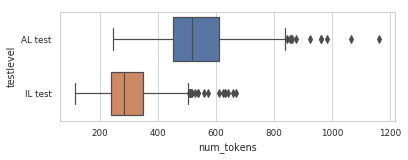

In [13]:
with sns.plotting_context('paper'):
    sns.boxplot(x='num_tokens', y='testlevel', data=df)
    plt.gcf().set_size_inches(6, 2)

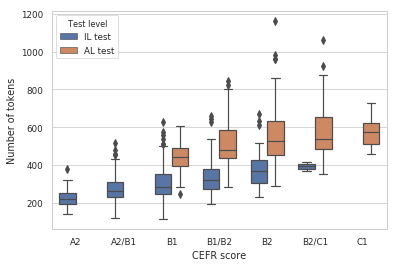

In [17]:
order = sorted(df.cefr.unique())
ax = sns.boxplot(x='cefr', y='num_tokens', hue='testlevel', data=df,
                 order=order, hue_order=['IL test', 'AL test'], width=.7)
ax.set(label='Test Level', ylabel='Number of tokens', xlabel='CEFR score')
ax.get_legend().set(title='Test level')
# plt.savefig(str(IMG_DIR / 'testlevel_lengths_per_cefr.pdf'), bbox_inches='tight')